In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import seaborn as sns

In [2]:
data_path = os.getcwd()+"/datasets"
atlantic_path = data_path + "/atlantic.csv"
pacific_path = data_path + "/pacific.csv"

atlantic = pd.read_csv(atlantic_path)
pacific = pd.read_csv(pacific_path)

### Data Preprocessing

Converting Longitude and Latitude to floats from strings

In [3]:
# Function to move the last character to the beginning
def move_last_char_to_beginning(s):
    if len(s) > 1:  
        return s[-1] + s[:-1]
    return s 

atlantic['Latitude'] = atlantic['Latitude'].apply(move_last_char_to_beginning)
atlantic['Longitude'] = atlantic['Longitude'].apply(move_last_char_to_beginning)
pacific['Latitude'] = pacific['Latitude'].apply(move_last_char_to_beginning)
pacific['Longitude'] = pacific['Longitude'].apply(move_last_char_to_beginning)

atlantic['Latitude'] = atlantic['Latitude'].str.replace('N', '').str.replace('S', '-').astype(float)
atlantic['Longitude'] = atlantic['Longitude'].str.replace('E', '').str.replace('W', '-').astype(float)

pacific['Latitude'] = pacific['Latitude'].str.replace('N', '').str.replace('S', '-').astype(float)
pacific['Longitude'] = pacific['Longitude'].str.replace('E', '').str.replace('W', '-').astype(float)

Combining Datasets

In [4]:
atlantic['Database'] = 'Atlantic'
pacific['Database'] = 'Pacific'

hurricanes = combined_df = pd.concat([atlantic, pacific], ignore_index=True)
hurricanes.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Database
0,AL011851,UNNAMED,18510625,0,,HU,28.0,-94.8,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,Atlantic
1,AL011851,UNNAMED,18510625,600,,HU,28.0,-95.4,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,Atlantic
2,AL011851,UNNAMED,18510625,1200,,HU,28.0,-96.0,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,Atlantic
3,AL011851,UNNAMED,18510625,1800,,HU,28.1,-96.5,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,Atlantic
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2,-96.8,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,Atlantic


Fixing some features

In [5]:
hurricanes['Basin'] = hurricanes['ID'].str[0:2]
hurricanes['ATCF cyclone number'] = hurricanes['ID'].str[2:4]
hurricanes['Year'] = hurricanes['ID'].str[4:]

In [6]:
hurricanes['Date'] = pd.to_datetime(hurricanes['Date'], format='%Y%m%d')
hurricanes['Time'] = hurricanes['Time'].astype(str) # need to check later to see if this works
hurricanes['Time'] = hurricanes['Time'].str.zfill(4)
hurricanes['Time'] = pd.to_datetime(hurricanes['Time'], format='%H%M').dt.time

In [7]:
hurricanes = hurricanes.drop(columns=['ID'])
hurricanes.head()

,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,...,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Database,Basin,ATCF cyclone number,Year
0,UNNAMED,1851-06-25,00:00:00,,HU,28.0,-94.8,80,-999,-999,...,-999,-999,-999,-999,-999,-999,Atlantic,AL,01,1851
1,UNNAMED,1851-06-25,06:00:00,,HU,28.0,-95.4,80,-999,-999,...,-999,-999,-999,-999,-999,-999,Atlantic,AL,01,1851
2,UNNAMED,1851-06-25,12:00:00,,HU,28.0,-96.0,80,-999,-999,...,-999,-999,-999,-999,-999,-999,Atlantic,AL,01,1851
3,UNNAMED,1851-06-25,18:00:00,,HU,28.1,-96.5,80,-999,-999,...,-999,-999,-999,-999,-999,-999,Atlantic,AL,01,1851
4,UNNAMED,1851-06-25,21:00:00,L,HU,28.2,-96.8,80,-999,-999,...,-999,-999,-999,-999,-999,-999,Atlantic,AL,01,1851


In [8]:
hurricanes.dtypes

Name                           object
Date                   datetime64[ns]
Time                           object
Event                          object
Status                         object
Latitude                      float64
Longitude                     float64
Maximum Wind                    int64
Minimum Pressure                int64
Low Wind NE                     int64
Low Wind SE                     int64
Low Wind SW                     int64
Low Wind NW                     int64
Moderate Wind NE                int64
Moderate Wind SE                int64
Moderate Wind SW                int64
Moderate Wind NW                int64
High Wind NE                    int64
High Wind SE                    int64
High Wind SW                    int64
High Wind NW                    int64
Database                       object
Basin                          object
ATCF cyclone number            object
Year                           object
dtype: object

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

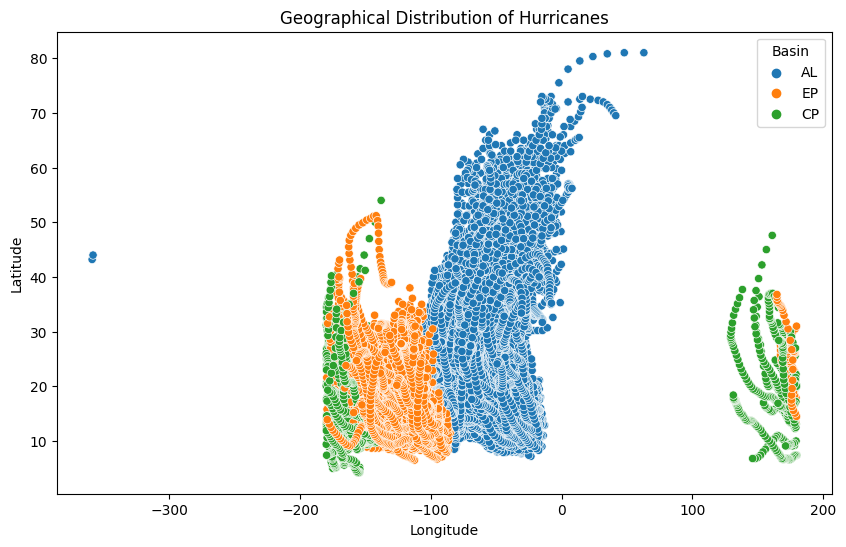

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

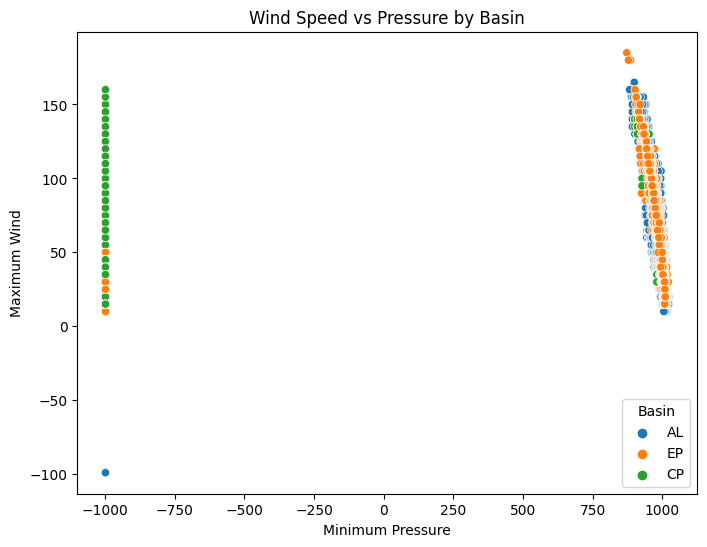

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


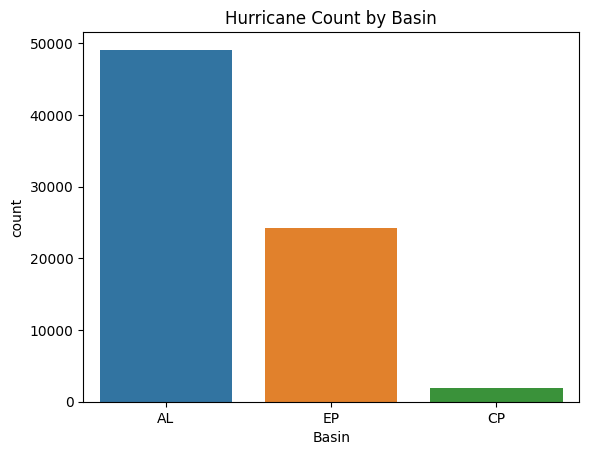

In [10]:
# Latitude vs Longitude: Scatter plot to show locations
plt.figure(figsize=(10,6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Basin', data=hurricanes)
plt.title('Geographical Distribution of Hurricanes')
plt.show()

# Plot relationship between wind speed and pressure
plt.figure(figsize=(8,6))
sns.scatterplot(x='Minimum Pressure', y='Maximum Wind', hue='Basin', data=hurricanes)
plt.title('Wind Speed vs Pressure by Basin')
plt.show()

# Countplot for Basin
sns.countplot(x='Basin', data=hurricanes)
plt.title('Hurricane Count by Basin')
plt.show()


In [ ]:
hurricanes['Minimum Pressure']

In [11]:
# Correlation matrix
corr_matrix = hurricanes.corr()

# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: '            UNNAMED'